# 02. Neural Network Classification with TensorFlow

1. **binary classification**
2. **multi-class classification**
3. **multi-label classification**

In [1]:
import tensorflow as tf
from sklearn.datasets import make_circles

In [2]:
make_circles

<function sklearn.datasets._samples_generator.make_circles(n_samples=100, *, shuffle=True, noise=None, random_state=None, factor=0.8)>

In [3]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, noise=0.03, random_state=42)

In [4]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [5]:
# See the first 10 labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

In [6]:
# Split data into train and test sets
X_train, y_train = X[:800], y[:800] # 80% of the data for the training set
X_test, y_test = X[800:], y[800:] # 20% of the data for the test set

# Check the shapes of the data
X_train.shape, X_test.shape # 800 examples in the training set, 200 examples in the test set 

((800, 2), (200, 2))

In [7]:
# Make dataframe of features and labels
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0], "X1":X[:, 1], "label":y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
# Check out the different labels
circles.label.value_counts()

1    500
0    500
Name: label, dtype: int64

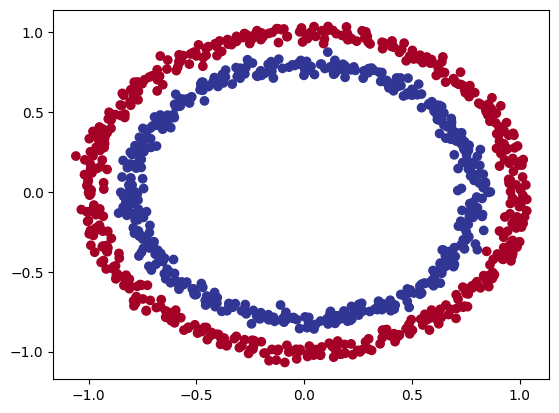

In [9]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

In [10]:
# Check the shapes of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

## Create the model for classification

In [11]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_7 = tf.keras.Sequential([
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 1, ReLU activation
  tf.keras.layers.Dense(10, activation=tf.keras.activations.relu), # hidden layer 2, ReLU activation
  tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid) # ouput layer, sigmoid activation
])

# Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['accuracy'])

# Fit the model
history = model_7.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 0s 1ms/step - loss: 0.6977 - accuracy: 0.4750
Epoch 2/25
25/25 [==============================] - 0s 838us/step - loss: 0.6867 - accuracy: 0.5312
Epoch 3/25
25/25 [==============================] - 0s 818us/step - loss: 0.6800 - accuracy: 0.5487
Epoch 4/25
25/25 [==============================] - 0s 783us/step - loss: 0.6608 - accuracy: 0.6237
Epoch 5/25
25/25 [==============================] - 0s 911us/step - loss: 0.6248 - accuracy: 0.6750
Epoch 6/25
25/25 [==============================] - 0s 736us/step - loss: 0.5539 - accuracy: 0.8500
Epoch 7/25
25/25 [==============================] - 0s 761us/step - loss: 0.4657 - accuracy: 0.9325
Epoch 8/25
25/25 [==============================] - 0s 865us/step - loss: 0.3643 - accuracy: 0.9362
Epoch 9/25
25/25 [==============================] - 0s 885us/step - loss: 0.2709 - accuracy: 0.9825
Epoch 10/25
25/25 [==============================] - 0s 861us/step - loss: 0.1870 - accuracy: 0.9950
E

In [12]:
model_7.evaluate(X, y)

32/32 [==============================] - 0s 1ms/step - loss: 0.0133 - accuracy: 1.0000


[0.013270877301692963, 1.0]

313/313 [==============================] - 0s 695us/step
doing binary classifcation...


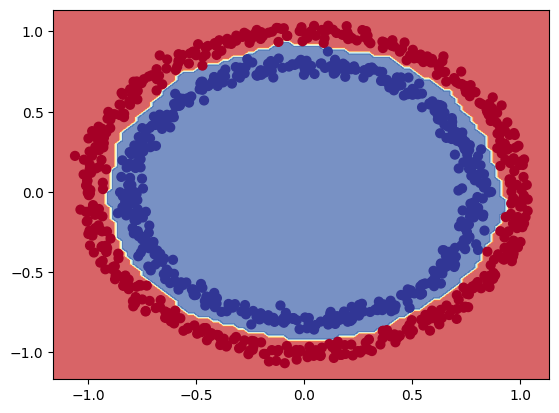

In [14]:
from utils import plot_decision_boundary

# Check out the predictions our model is making
plot_decision_boundary(model_7, X, y)

In [16]:
# Check the accuracy of our model
loss, accuracy = model_7.evaluate(X_test, y_test)
print(f"Model loss on test set: {loss}")
print(f"Model accuracy on test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 4ms/step - loss: 0.0165 - accuracy: 1.0000
Model loss on test set: 0.01648636907339096
Model accuracy on test set: 100.00%


In [21]:
# Create a confusion matrix
from sklearn.metrics import confusion_matrix

# Make predictions
y_preds = model_7.predict(X_test)

confusion_matrix(y_test, tf.round(y_preds))

7/7 [==============================] - 0s 4ms/step


array([[101,   0],
       [  0,  99]], dtype=int64)

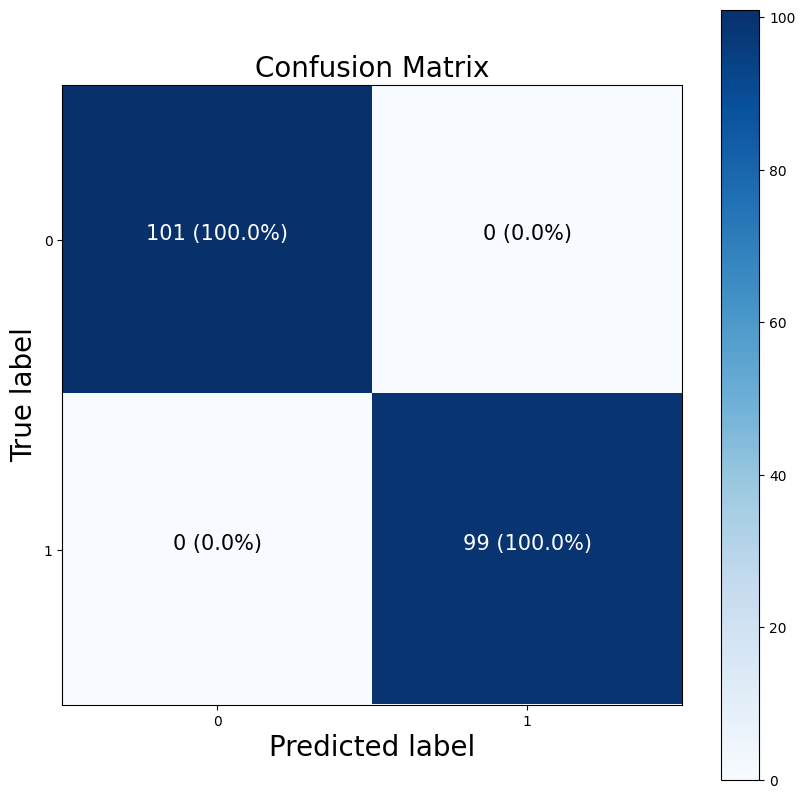

In [22]:
# Note: The following confusion matrix code is a remix of Scikit-Learn's 
# plot_confusion_matrix function - https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html
# and Made with ML's introductory notebook - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb 
import itertools

figsize = (10, 10)

# Create the confusion matrix
cm = confusion_matrix(y_test, tf.round(y_preds))
cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis] # normalize it
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot
cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
fig.colorbar(cax)

# Create classes
classes = False

if classes:
    labels = classes
else:
    labels = np.arange(cm.shape[0])

# Label the axes
ax.set(title="Confusion Matrix",
       xlabel="Predicted label",
       ylabel="True label",
       xticks=np.arange(n_classes),
       yticks=np.arange(n_classes),
       xticklabels=labels,
       yticklabels=labels)

# Set x-axis labels to bottom
ax.xaxis.set_label_position("bottom")
ax.xaxis.tick_bottom()

# Adjust label size
ax.xaxis.label.set_size(20)
ax.yaxis.label.set_size(20)
ax.title.set_size(20)

# Set threshold for different colors
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
           horizontalalignment="center",
           color="white" if cm[i, j] > threshold else "black",
           size=15)